<a href="https://colab.research.google.com/github/sachinkun21/Titanic_kaggle/blob/master/Titanic_Disaster_Prediction_Kaggle_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Introduction

In this kernel I will go through the whole process of creating a machine learning model on the famous Titanic dataset, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. In this challenge, I will predict whether a passenger on the titanic would have been survived or not.

### About Titanic 

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

### About the Data Set

We have data of all passengers and the problem statement is to predict the survival  of a passenger given his current data inputs. The complete data can be downloaded here - www.kaggle.com/c/titanic

Data Tale demo
Titanic - The sad story
Exploratory Data Analysis I
Exploratory Data Analysis II
This is your last visited course section.Resume Course 
EDA - Plotting
Preprocessing
Preprocessing II
Feature Engineering
Modelling
Advanced Modelling
Final Model
Model Evaluation
Feedback



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Loading Data and Diagnostics
Let's import all required packages. Each package will be explained whenever it is used

In [0]:
# linear algebra
import numpy as np
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algortithmic packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

import os

Let's Load the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(os.listdir("/content/drive/My Drive/titanic"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [7]:
train_df = pd.read_csv('/content/drive/My Drive/titanic/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/titanic/test.csv')

#printing first 5 rows of data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check info of the dataset to get an idea of how it's looking

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training set has 891 examples and 11 features along with the Target variable(survived). Datatypes for 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

survival:   Survival<br>
PassengerId: Unique Id of a passenger.<br>
pclass:     Ticket class    <br>
sex   :     Sex <br>
Age   :     Age in years    
sibsp :     # of siblings / spouses aboard the Titanic  <br>
parch :     # of parents / children aboard the Titanic  <br>
ticket:     Ticket number   <br>
fare  :     Passenger fare  <br>
cabin :     Cabin number    <br>
embarked:   Port of Embarkation<br>

In [9]:
# let's display the columns names
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Let's take a look at description of numerical Values in Dataset

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature. Also we can find outliers if any by visual observation of quartiles.

Let's look at head of the data

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

Let's take a more detailed look at what data is actually missing:

In [12]:
# count of null values in each column
count  = train_df.isnull().sum().sort_values(ascending = False)

# percentage of Null Values in each column
percent = train_df.isnull().sum()/train_df.count()*100

# rounding and arranging the percentage
percent = round(percent,2).sort_values(ascending = False)

# concatenating count and percentage into one
missing_data = pd.concat([count,percent], axis = 1)

# printing top 5 rows
missing_data.head()

,0,1
Cabin,687,336.76
Age,177,24.79
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


If you notice, Cabin has the highest percentage. The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the 'Age' feature, which has 177 missing values. The 'Cabin' feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.



### Visualization

To check the relationship between survival vs age/sex, let's plot some graphs

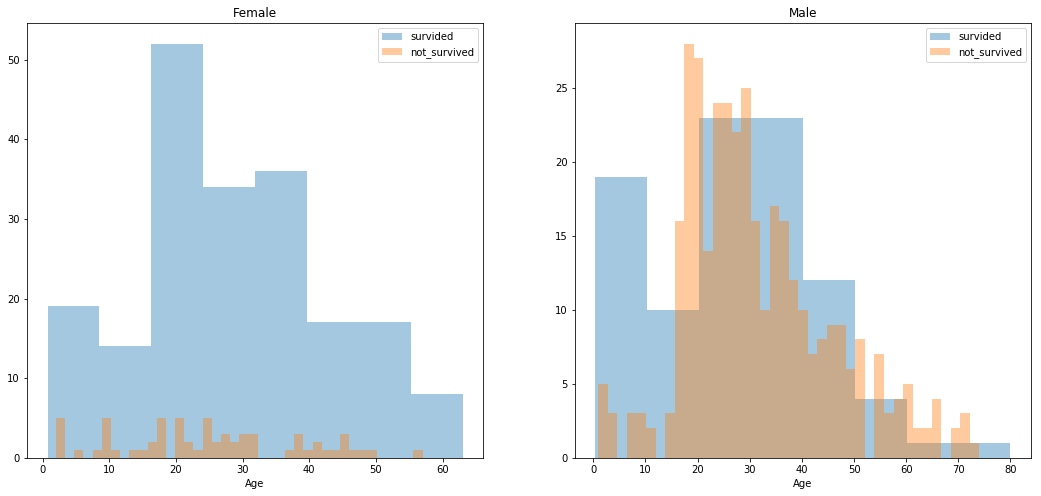

In [19]:
survived = 'survided'
not_survived = 'not_survived'
fig, axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (18,8))
women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=8, label = survived , ax=axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label=not_survived, ax = axes[0], kde =False)
ax.set_title('Female')
ax.legend()

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=8, label = survived , ax=axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins = 40, label=not_survived, ax = axes[1], kde =False)
_ = ax.set_title('Male')
ax.legend()
plt.show()

As we can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

### 2. Embarked, Pclass and Sex:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


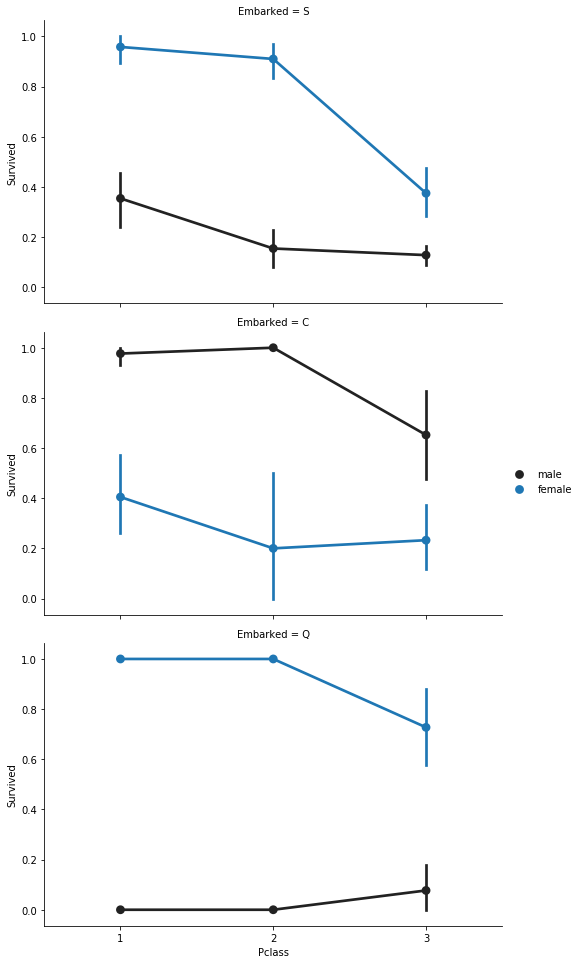

In [22]:
facetgrid = sns.FacetGrid(train_df, row = 'Embarked',size = 4.5 , aspect = 1.6)
facetgrid.map(sns.pointplot,'Pclass', 'Survived' , 'Sex', palette = None , order = None, hue_order = None)
facetgrid.add_legend()
plt.show()

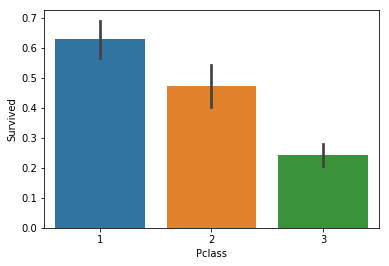

In [24]:
sns.barplot(x = 'Pclass' , y = 'Survived' ,  data = train_df)
plt.show()

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

Let's see the distribution of P Class:

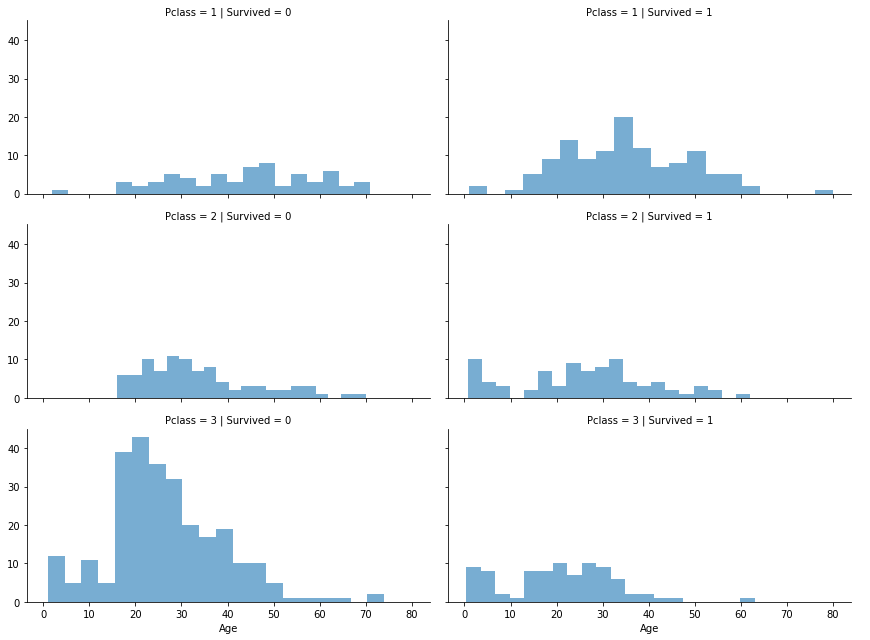

In [27]:
grid = sns.FacetGrid(train_df , col = 'Survived', row = 'Pclass' , height = 3,  aspect = 2)
grid.map(plt.hist , 'Age', alpha = 0.6 , bins =20)
grid.add_legend()
plt.show()

Creating a new feature - 'not_alone'
Assuming being alone and survival rate has high dependency. let's see it.  

In [0]:
data = [train_df, test_df]
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives']>0, 'not_alone']=1
  dataset.loc[dataset['relatives']==0, 'not_alone']=0
  dataset['not_alone']=dataset['not_alone'].astype(int)
  

In [34]:
train_df['not_alone'].value_counts()

0    537
1    354
Name: not_alone, dtype: int64